<a href="https://colab.research.google.com/github/Code-Test-Source/MCM26-25Crepo/blob/main/Figure%2014%20Countries%20and%20Probability%20of%20Winning%20Medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
文件读取成功！


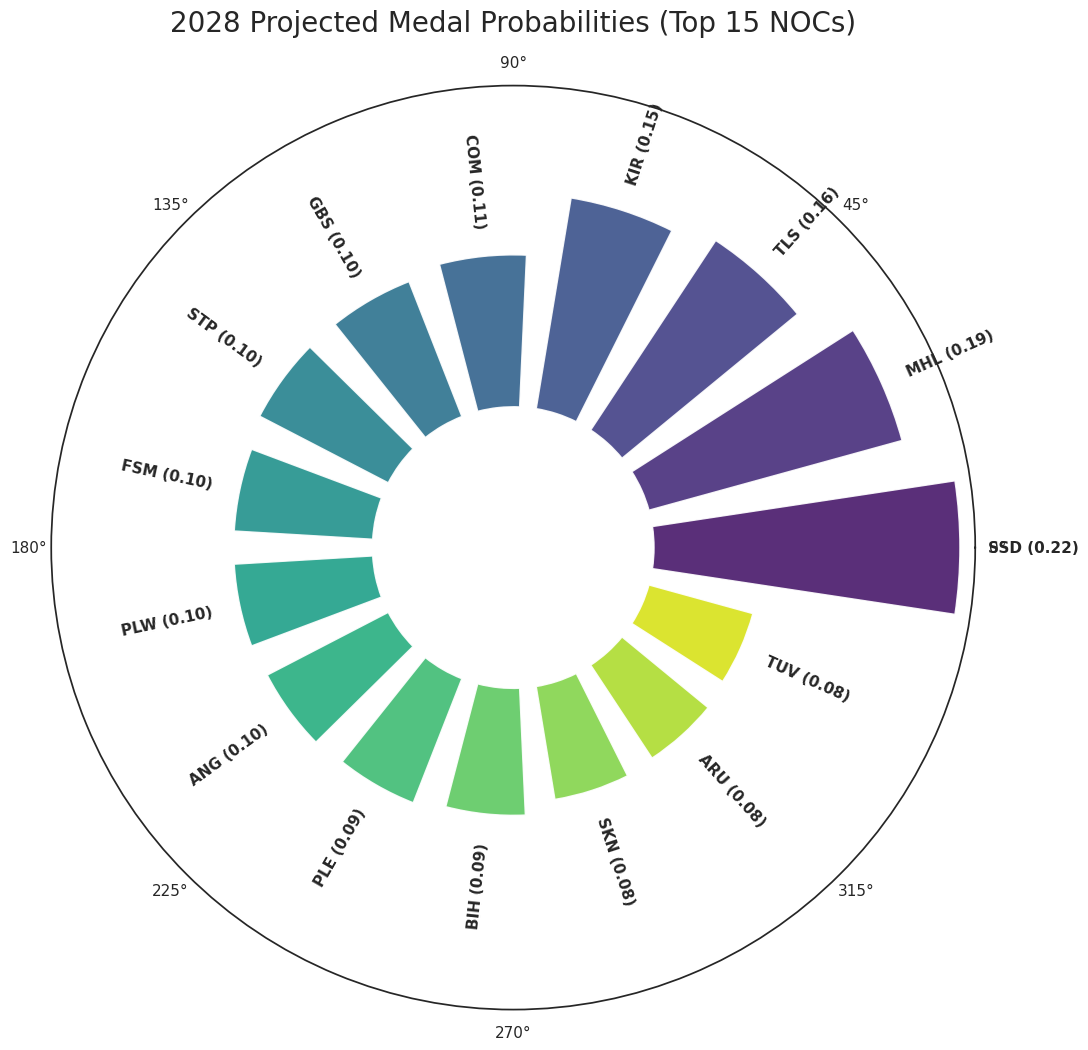

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# 1. 挂载 Google Drive
drive.mount('/content/drive')

# 2. 设置文件路径 (根据您的描述，文件在 My Drive 根目录下)
file_path = '/content/drive/MyDrive/projected_2028_predictions.csv'

# 3. 读取数据
try:
    df = pd.read_csv(file_path)
    print("文件读取成功！")
except FileNotFoundError:
    print("错误：未找到文件，请检查文件名或路径是否正确。")

# 4. 数据预处理：选取概率 (prob) 最高的前 15 个国家/地区
# 径向图如果数据过多会非常拥挤，前 15-20 个效果最好
top_n = 15
plot_data = df.sort_values('prob', ascending=False).head(top_n)

# 5. 绘图设置
plt.figure(figsize=(12, 12))
sns.set_theme(style="white")

# 设置极坐标
ax = plt.subplot(111, polar=True)

# 移除极坐标的网格和刻度
ax.grid(False)
ax.set_yticklabels([])

# 计算角度
lower_limit = 0.1  # 圆心留白的比例
label_padding = 0.02
angles = np.linspace(0, 2 * np.pi, len(plot_data), endpoint=False)
values = plot_data['prob'].values

# 使用 Seaborn 调色板
colors = sns.color_palette("viridis", len(plot_data))

# 6. 绘制径向柱状图
# width 控制柱子的宽度
bars = ax.bar(angles, values, width=0.3, bottom=lower_limit, color=colors, alpha=0.9)

# 7. 添加文字标签 (NOC 代码和概率值)
for angle, value, label in zip(angles, values, plot_data['NOC']):
    rotation = np.rad2deg(angle)
    # 调整文字方向，使其在圆周上更易读
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=value + lower_limit + label_padding,
        s=f"{label} ({value:.2f})",
        ha=alignment, va='center',
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11, fontweight='bold'
    )

plt.title("2028 Projected Medal Probabilities (Top 15 NOCs)", size=20, y=1.05)
plt.show()